In [259]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd


def rolling_mean_dataframe(df, window=2, min_periods=1):
    """
    Calculate the rolling mean for each column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    window (int): The size of the moving window. Default is 2.
    min_periods (int): Minimum number of observations in window required to have a value. Default is 1.

    Returns:
    pd.DataFrame: A new DataFrame with the rolling means.
    """
    return df.rolling(window=window, min_periods=min_periods).mean()

def generate_plots_yr(df, metrics, years, lreturn,major_events, figsize=(15, 10)):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=figsize)
    
    

    # Iterate over metrics and corresponding axes
    for i, (metric_name, metric_data) in enumerate(metrics.items()):
        row = i // 3
        col = i % 3
        
        ax = axes[row, col]
        y = metric_data
        ax.plot(years, y, color='black', linewidth=2)  # Set line thickness

        # Find and plot peaks (positive and negative)
        peaks, _ = find_peaks(y, height=0.3)
        yp = [y[i] for i in peaks]
        yri = [years[i] for i in peaks]
       # ax.plot(yri, yp, "x", color='red')

        peaks, _ = find_peaks(-np.array(y), height=0.3)
        yp = [y[i] for i in peaks]
        yri = [years[i] for i in peaks]
        #ax.plot(yri, yp, "x", color='red')

        # Plot scaled 'lreturn'
       
        lr100 = [(i - np.min(lreturn)) / (np.max(lreturn) - np.min(lreturn)) * (np.max(y) - np.min(y)) + np.min(y)/1.4 for i in lreturn]
        
        ax.plot(years, lr100, linewidth=2)  # Set line thickness for scaled return

        # Find and plot peaks for the scaled 'lreturn'
        peaks, _ = find_peaks(lr100, height=0.3)
        yp = [lr100[i] for i in peaks]
        yri = [years[i] for i in peaks]
       # ax.plot(yri, yp, "x", color='red')

        peaks, _ = find_peaks(-np.array(lr100), height=0.3)
        yp = [lr100[i] for i in peaks]
        yri = [years[i] for i in peaks]
      #  ax.plot(yri, yp, "x", color='red')

        # Add vertical dashed lines for major events
        for event_year, event_label in major_events.items():
            if event_year in years:
                # If the event year exists in the data, plot the vertical line at that year
                event_index = years.index(event_year)
                ax.axvline(x=years[event_index],color='purple', linestyle='--', linewidth=1.5, label=event_label)
            else:
                # If the event year doesn't exist in the data, interpolate between two closest years
                closest_years = sorted(years, key=lambda x: abs(x - event_year))
                year_before = closest_years[0]
                year_after = closest_years[1]
                # Calculate the midpoint between the two years
                interpolated_year = (year_before + year_after) / 2
                # Plot a vertical line at the interpolated year
                ax.axvline(x=interpolated_year,color='purple', linestyle='--', linewidth=1.5, label=event_label)

        # Add legend for the major events (only once)
        #ax.legend(loc='upper left', fontsize=10)
        
        # Set the ylabel for each metric
        ax.set_ylabel(metric_name, fontsize=12)  # Adjust font size for ylabel
        ax.set_xlabel('Years', fontsize=12)  # Add and adjust xlabel

        ax.grid(True)  # Add grid lines for better readability
    plt.savefig('data_dynamicalnet/networkstat_dynamics_returns_fromMarket_24months40yrs_th_adaptv2.png', dpi=300, bbox_inches='tight')
    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()


import datetime as dt
import matplotlib.dates as mdates
def generate_plots_hours(df, metrics, years, lreturn, major_events, figsize=(15, 10)):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=figsize)

    # Convert fractional years to datetime for labeling
    base_date = dt.datetime(2022, 1, 1)  # Starting from January 1, 2022
    dates = [base_date + dt.timedelta(days=(yr - 2022) * 365.25) for yr in years]

    # Iterate over metrics and corresponding axes
    for i, (metric_name, metric_data) in enumerate(metrics.items()):
        row = i // 3
        col = i % 3

        ax = axes[row, col]
        y = metric_data
        ax.plot(dates, y, color='black', linewidth=2)  # Set line thickness

        # Find and plot peaks (positive and negative)
        peaks, _ = find_peaks(y, height=0.95)
        yp = [y[i] for i in peaks]
        yri = [dates[i] for i in peaks]
        #ax.plot(yri, yp, "x", color='red')

        peaks, _ = find_peaks(-np.array(y), height=0.95)
        yp = [y[i] for i in peaks]
        yri = [dates[i] for i in peaks]
        #ax.plot(yri, yp, "x", color='red')

        # Plot scaled 'lreturn'
        if metric_name != 'Resilience':
            lr100 = [(i - np.min(lreturn)) / (np.max(lreturn) - np.min(lreturn)) * (np.max(y) - np.min(y)) + np.min(y)/1.1 for i in lreturn]
        else:
            lr100 = [(i - np.min(lreturn)) / (np.max(lreturn) - np.min(lreturn)) * (np.max(y) - np.min(y)) + 0.99 for i in lreturn]

        ax.plot(dates, lr100, linewidth=2)  # Set line thickness for scaled return

        # Find and plot peaks for the scaled 'lreturn'
        peaks, _ = find_peaks(lr100, height=0.95)
        yp = [lr100[i] for i in peaks]
        yri = [dates[i] for i in peaks]
        #ax.plot(yri, yp, "x", color='red')

        peaks, _ = find_peaks(-np.array(lr100), height=0.95)
        yp = [lr100[i] for i in peaks]
        yri = [dates[i] for i in peaks]
        #ax.plot(yri, yp, "x", color='red')

        # Add vertical dashed lines for major events
        for event_year, event_label in major_events.items():
            if event_year in years:
                event_index = years.index(event_year)
                ax.axvline(x=dates[event_index], color='purple', linestyle='--', linewidth=1.5, label=event_label)
            else:
                closest_years = sorted(years, key=lambda x: abs(x - event_year))
                year_before = closest_years[0]
                year_after = closest_years[1]
                interpolated_year = (year_before + year_after) / 2
                interpolated_date = base_date + dt.timedelta(days=(interpolated_year - 2022) * 365.25)
                ax.axvline(x=interpolated_date, color='purple', linestyle='--', linewidth=1.5, label=event_label)

        # Set the x-axis to show months and years
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Month-Year format
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Every 6 months

        ax.set_ylabel(metric_name, fontsize=12)
        ax.set_xlabel('Time', fontsize=12)
        ax.grid(True)

    plt.tight_layout()
    plt.savefig('data_dynamicalnet/networkstat_dynamics_returns_hours_th_adaptv2.png', dpi=300, bbox_inches='tight')
    plt.show()
    



30 30


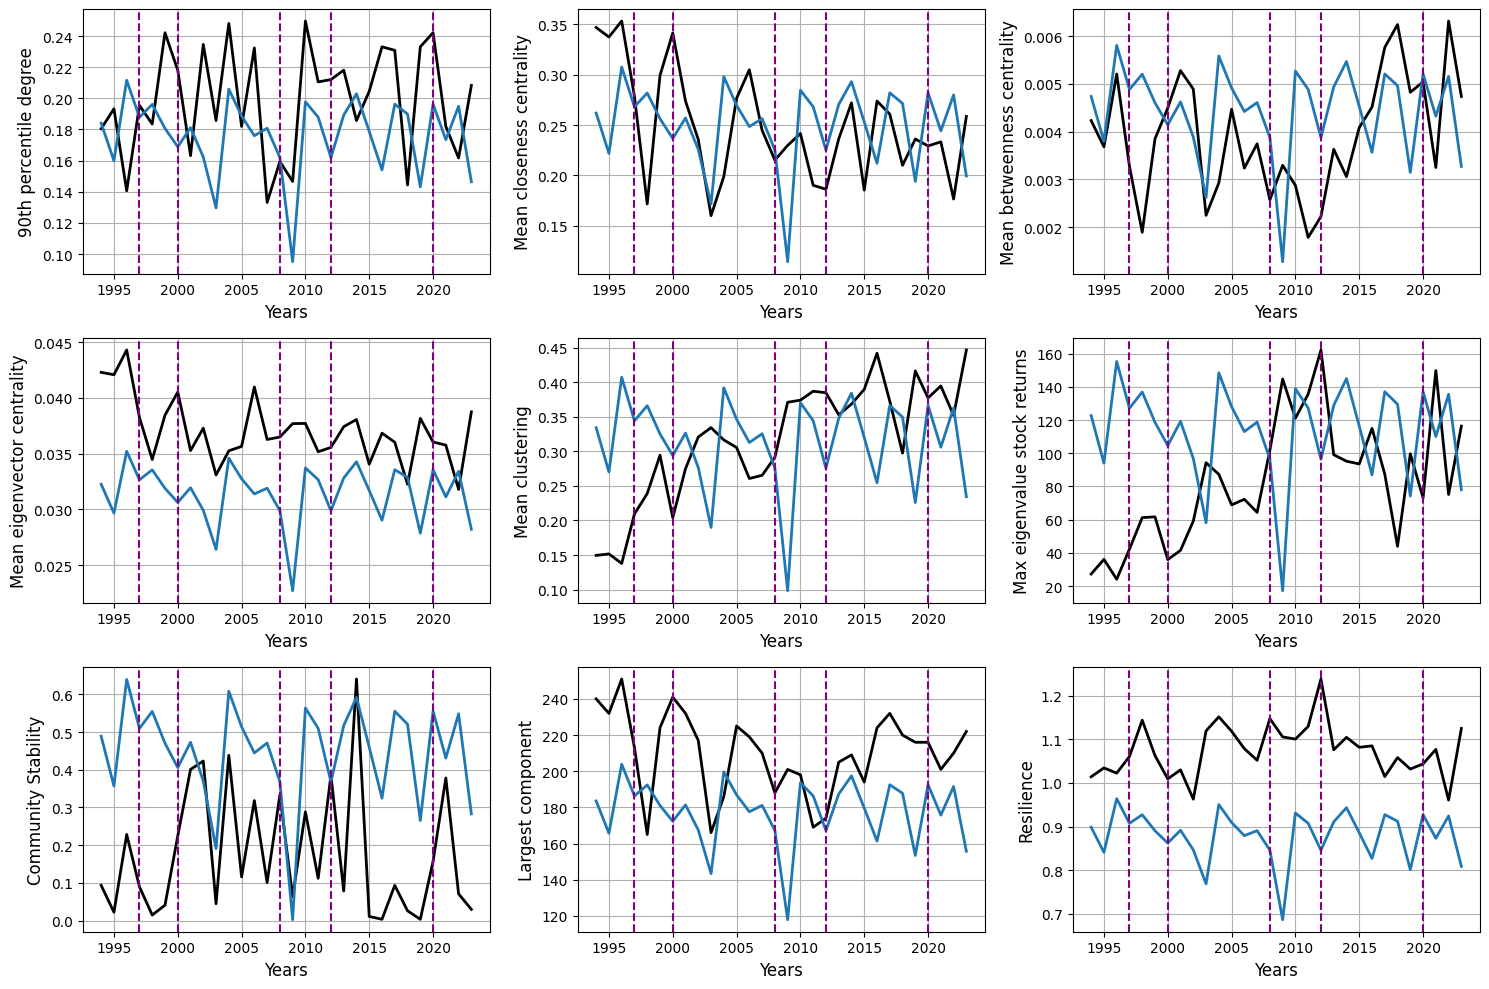

In [260]:
df=pd.read_csv('data_pdfnetwork_yglob/Globalresults_yr.csv')

major_events = {
       # 1987: "Black Monday",
        1997:"Asian Financial Crisis", #Source: IMF, World Bank
        2000: "Dotcom Crash",
        2008: "Subprime Crisis",
        2012: "Federal Reserve's QE3 Announcement (September 2012)", #Source: Federal Reserve, CNBC
        2020: "COVID-19 Market Crash"
    }
# Example usage with DataFrame columns
metrics = {
    "90th percentile degree": df['90th percentile degree'].values,
    "Mean closeness centrality": df['mean closeness centrality'].values,
    "Mean betweenness centrality": df['mean betweenness centrality'].values,
    "Mean eigenvector centrality": df['mean eigenvector centrality'].values,
    "Mean clustering": df['mean clustering'].values,
    "Max eigenvalue stock returns": df['Max eigenvalue stock returns'].values,
    "Community Stability": df['Community Stability'].values,
    "Largest component": df['largest component'].values,
    "Resilience": df['Resilience'].values
}


# Define years based on data
sty=1993
Trading=252
years=[]
ic=0
Time= 7805
for tscale in range(0,Time-Trading,Trading):
    ic+=1
    yr=ic+sty
   # print(yr)
    years.append(yr)


lreturn = df['log return'].values
print(len(years),len(lreturn))
# Call the function
generate_plots_yr(df, metrics, years, lreturn,major_events)

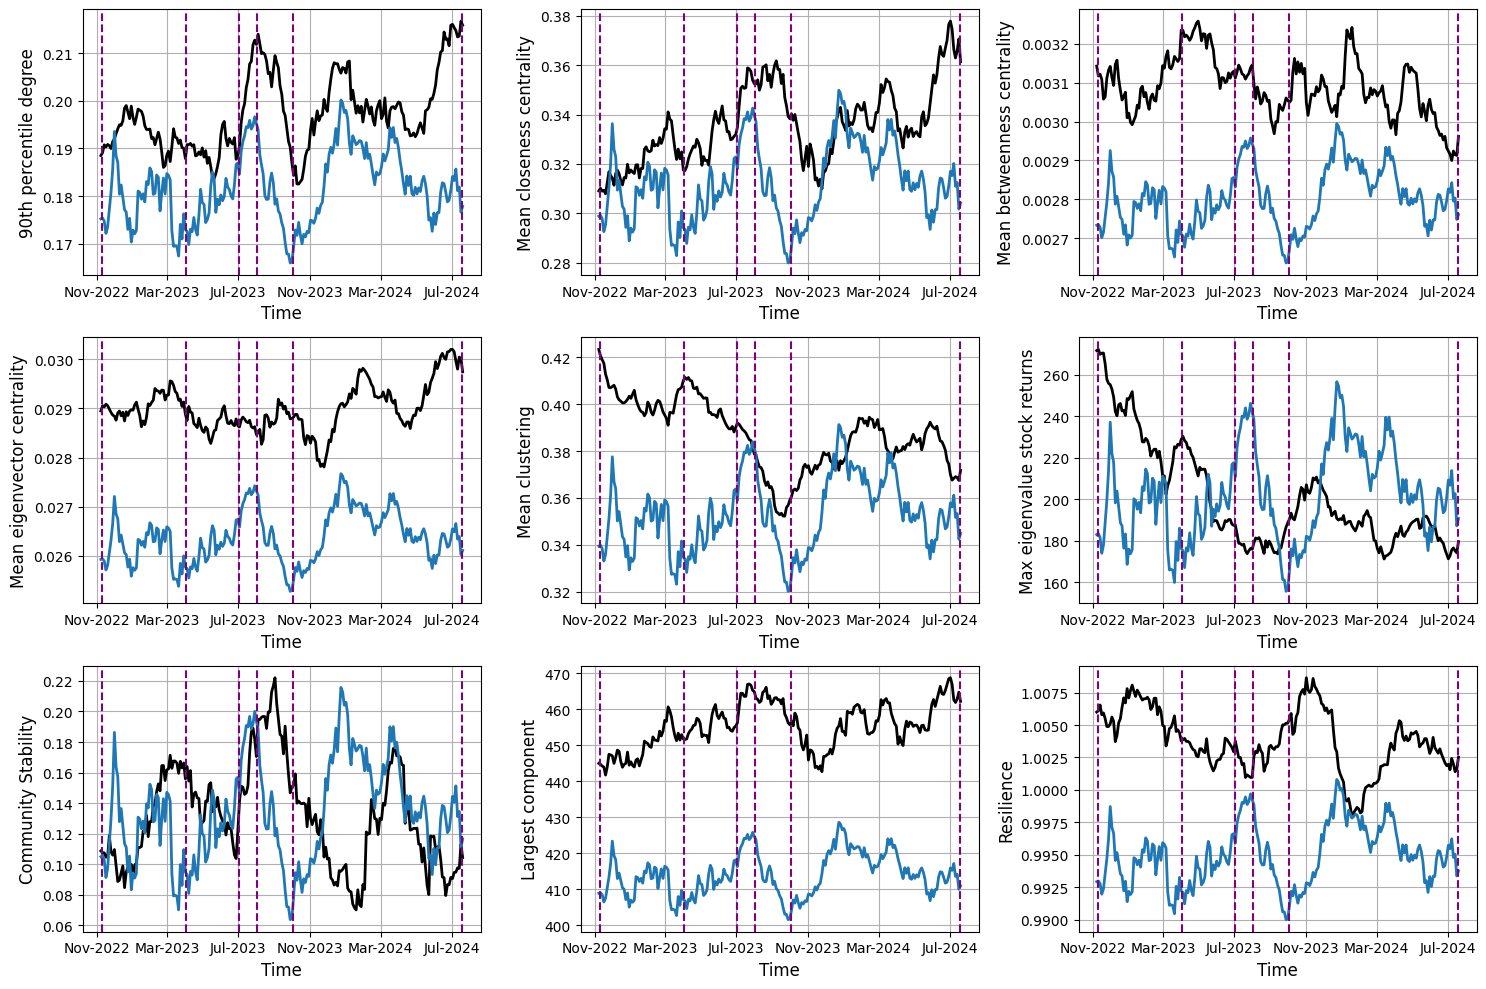

In [256]:
from datetime import datetime, timedelta
dftemp=pd.read_csv('data_pdfnetwork_hglob/Globalresults_hours.csv')
major_events = {
    #(2022+21*9/252): "Federal Reserve Interest Rate Hikes (September 2022)",  # Source: Federal Reserve announcements
    (2022+10*21/252): "Market Volatility Amid Inflation Concerns (October 2022)",  # Source: CNBC
    (2023+3*21/252):"SVB Bank Collapse (March 2023)",#CNBC
    (2023+6*21/252):"US Debt Ceiling Agreement (June 2023)", # CNBC
    (2023+7*21/252):"Tech Sector Rally (July 2023)", # Bloomberg
    (2023+9*21/252): "Federal Reserve Interest Rate Hike (September 2023)",  # Source: Federal Reserve Press Release
    (2024+10*21/252): "Market Correction Due to Rising Bond Yields (October 2024)",  # Source: nasdaq.com
    
}

# Example usage with DataFrame columns
metrics = {
    "90th percentile degree": df['90th percentile degree'].values,
    "Mean closeness centrality": df['mean closeness centrality'].values,
    "Mean betweenness centrality": df['mean betweenness centrality'].values,
    "Mean eigenvector centrality": df['mean eigenvector centrality'].values,
    "Mean clustering": df['mean clustering'].values,
    "Max eigenvalue stock returns": df['Max eigenvalue stock returns'].values,
    "Community Stability": df['Community Stability'].values,
    "Largest component": df['largest component'].values,
    "Resilience": df['Resilience'].values
}
W=23
df2=rolling_mean_dataframe(dftemp,window=W)

sty=2022
Trading=14
years=[]
ic=21*8/252-2/252
Time= 3346
for tscale in range(0,Time-Trading,Trading):
    ic+=2/252
    yr=2022+ic #+sty
   
    years.append(yr)

df=df2.loc[W:,:]
lreturn = np.array(df['log return'].values)+np.max(np.abs(lreturn))
generate_plots_hours(df, metrics, years[W:], lreturn,major_events)

In [263]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for the Wikipedia page that lists S&P 500 historical components
base_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Function to scrape the S&P 500 list for a given year
def get_sp500_components(year):
    # Modify the URL to reflect the year
    url = f"https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#Year_{year}"

    # Send a GET request to the Wikipedia page
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find the table that contains the stock data
    table = soup.find('table', {'class': 'wikitable'})

    # List to store the stock symbols and company names
    companies = []

    # Loop through each row in the table
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        
        if len(cols) > 1:
            ticker = cols[0].text.strip()  # Ticker symbol
            company = cols[1].text.strip()  # Company name
            companies.append((ticker, company))

    return companies

# Define the range of years (1993 to 2024)
years = list(range(1993, 2025))

# Create an empty DataFrame to store the results
all_companies = pd.DataFrame(columns=["Year", "Acronym", "Full Name"])

# Scrape the data for each year and store it in the DataFrame
for year in years:
    print(f"Scraping data for year {year}...")
    companies = get_sp500_components(year)
    
    # Add the year to the data
    year_data = [(year, ticker, company) for ticker, company in companies]
    
    # Convert the year_data to a DataFrame
    year_df = pd.DataFrame(year_data, columns=["Year", "Acronym", "Full Name"])
    
    # Concatenate the new data with the existing DataFrame
    all_companies = pd.concat([all_companies, year_df], ignore_index=True)

# Save the DataFrame to a CSV file
csv_filename = "historical_sp500_components.csv"
all_companies.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' has been created with historical S&P 500 companies from 1993 to 2024.")


Scraping data for year 1993...
Scraping data for year 1994...
Scraping data for year 1995...
Scraping data for year 1996...
Scraping data for year 1997...
Scraping data for year 1998...
Scraping data for year 1999...
Scraping data for year 2000...
Scraping data for year 2001...
Scraping data for year 2002...
Scraping data for year 2003...
Scraping data for year 2004...
Scraping data for year 2005...
Scraping data for year 2006...
Scraping data for year 2007...
Scraping data for year 2008...
Scraping data for year 2009...
Scraping data for year 2010...
Scraping data for year 2011...
Scraping data for year 2012...
Scraping data for year 2013...
Scraping data for year 2014...
Scraping data for year 2015...
Scraping data for year 2016...
Scraping data for year 2017...
Scraping data for year 2018...
Scraping data for year 2019...
Scraping data for year 2020...
Scraping data for year 2021...
Scraping data for year 2022...
Scraping data for year 2023...
Scraping data for year 2024...
CSV file